# PCA and Clustering Visualization
In this notebook, we will apply Principal Component Analysis (PCA) to reduce the dimensionality of the dataset. Then, we will visualize the clusters obtained from different clustering methods.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

## Load the Data
First, let's load the data that contains the clustering results.

In [2]:
%load_ext kedro.ipython

[09/14/23 17:52:30] INFO     Resolved project path as: c:\Users\Pablo                               __init__.py:136
                             Villar\Desktop\CURSOS\KSchool\Máster en Data                                          
                             Science\TFM\nuevo_entorno_kedro\hado.                                                 
                             To set a different path, run '%reload_kedro <project_root>'                           

[09/14/23 17:52:30] WARNING  C:\Users\Pablo                                                         warnings.py:109
                             Villar\AppData\Local\Programs\Python\Python310\lib\importlib\__init__.                
                             py:126: DeprecationWarning: `kedro.extras.datasets` is deprecated and                 
                             will be removed in Kedro 0.19, install `kedro-datasets` instead by                    
                             running `pip install kedro-datasets`.                                                 
                               return _bootstrap._gcd_import(name[level:], package, level)                         
                                                                                                                   

[09/14/23 17:52:31] INFO     Kedro project hado                                                     __init__.py:105

                    INFO     Defined global variable 'context', 'session', 'catalog' and            __init__.py:106
                             'pipelines'                                                                           

[09/14/23 17:52:32] INFO     Registered line magic 'run_viz'                                        __init__.py:112

In [3]:
df = catalog.load("hado_final")

                    INFO     Loading data from 'hado_final' (CSVDataSet)...                     data_catalog.py:345

In [4]:
df['diagnostico'].value_counts()

ITU (infeccion del tracto urinario)     172
infeccion respiratoria                  145
infeccion urinaria                      113
insuficiencia cardiaca                   73
cancer de colon                          70
                                       ... 
neoplasia mama traumatismo por caida      1
sobreinfeccion placas calcinosis          1
cancer oral                               1
infeccion abdominal                       1
neoplasia pulmon                          1
Name: diagnostico, Length: 1514, dtype: int64

In [6]:
df['diagnostico'].nunique()

1514

In [7]:
# Load the data
hado_data = pd.read_csv('hado_data_clustering.csv')

# Show the first few rows of the DataFrame
hado_data.head()

,h_procedencia,hospital_category,s_procedencia,procedencia_category,diagnostico,diagnosis_category,motivo_ing,ingreso_category,motivo_alta,alta_category,...,year,diagnostico_cluster,motivo_ing_cluster,motivo_alta_cluster,diagnostico_cluster_optimal,motivo_ing_cluster_optimal,motivo_alta_cluster_optimal,diagnostico_topic,diagnostico_dbscan,diagnostico_hierarchical
0,gil casares,Santiago,upal,Unidad Paliativos,cancer orl,Canceres y neoplasias,control sintomas,Sintomas,reingreso,Complicaciones,...,2017,0,1,2,0,1,2,2,0,3
1,clinico,Santiago,oncologia,Oncologia,melanoma vulvar,Neurologicas,mal control dolor,Sintomas,exitus,Exitus,...,2017,1,1,1,1,1,1,3,-1,5
2,clinico,Santiago,mir,MIR,cancer broncogenico,Canceres y neoplasias,control evolutivo,Evaluaciones,fin cuidados,Otros,...,2017,0,1,0,0,1,0,0,-1,3
3,clinico,Santiago,digestivo,Digestivo,cirrosis hepatica,Hepaticas y pancreaticas,administracion octreotido,Otros,fin cuidados,Otros,...,2017,1,0,0,1,0,0,3,1,5
4,clinico,Santiago,urgencias,Urgencias,neoplasia mama estadio iv,Canceres y neoplasias,control sintomas,Sintomas,exitus,Exitus,...,2017,2,1,1,2,1,1,0,2,3


In [8]:
hado_data = hado_data.rename(columns={'diagnostico_cluster_optimal': 'diagnostico_kmeans',
                                      'motivo_ing_cluster_optimal': 'motivo_ing_kmeans',
                                      'motivo_alta_cluster_optimal': 'motivo_alta_kmeans',
                                      'diagnostico_topic': 'diagnostico_lda'
                                     }
                            )

## Apply PCA
Now, let's apply Principal Component Analysis (PCA) to reduce the dimensionality of the TF-IDF features. We will reduce it to 2 dimensions for easy visualization.

In [9]:
hado_data = hado_data.dropna(subset=['diagnostico'])
hado_data.reset_index(drop=True, inplace=True)

In [10]:
# Importar la biblioteca necesaria para TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

# Crear un objeto TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Ajustar y transformar los datos de la columna 'diagnostico' al formato TF-IDF
diagnostico_tfidf = tfidf_vectorizer.fit_transform(hado_data['diagnostico'])

In [11]:
# Initialize PCA and the X vector for dimensionality reduction
pca = PCA(n_components=2)

# Assuming that the TF-IDF features are stored in a variable named 'diagnostico_tfidf'
X = diagnostico_tfidf.toarray()

# Apply PCA
principalComponents = pca.fit_transform(X)

# Create a DataFrame with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Show the first few rows of the DataFrame
principalDf.head()

,principal component 1,principal component 2
0,-0.165430,-0.073715
1,-0.001837,0.091852
2,-0.147616,-0.058710
3,0.001397,0.142767
4,-0.241605,-0.147760


## Visualize Clusters
Now that we have reduced the dimensionality of our data, let's visualize the clusters obtained from different clustering methods.

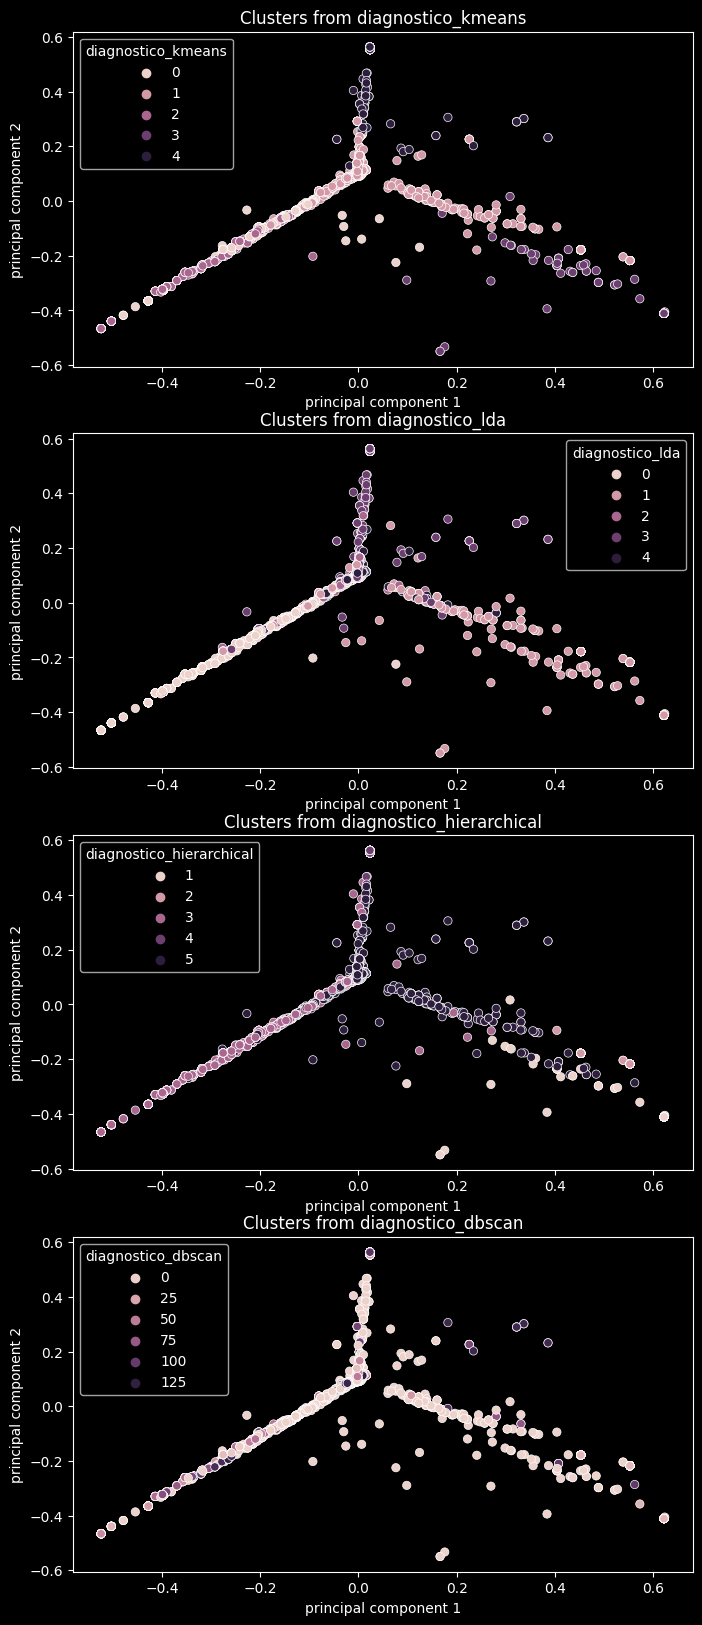

In [12]:
# Merge the principal components DataFrame with the original DataFrame
finalDf = pd.concat([principalDf, hado_data[['diagnostico_kmeans', 'diagnostico_lda', 'diagnostico_hierarchical', 'diagnostico_dbscan']]], axis = 1)

# Plotting the clusters obtained from different methods
fig, axes = plt.subplots(4, 1, figsize=(8, 20))

for ax, method in zip(axes, ['diagnostico_kmeans', 'diagnostico_lda', 'diagnostico_hierarchical', 'diagnostico_dbscan']):
    sns.scatterplot(x='principal component 1', y='principal component 2', hue=method, data=finalDf, ax=ax)
    ax.set_title(f'Clusters from {method}')

plt.show()

### Interpretación y Conclusiones

#### Observaciones Clave
1. **PCA**: La reducción de dimensionalidad a través de PCA parece efectiva para visualizar los datos en un espacio bidimensional.
  
2. **Visualización de Clusters**: 
    - **K-means**: Los clusters parecen bastante separados, lo que indica una buena agrupación.
    - **LDA**: Los clusters están menos separados en comparación con K-means.
    - **Clustering Jerárquico**: Similar a K-means, los clusters parecen bien separados.
    - **DBSCAN**: Este método parece identificar un cluster muy grande y varios más pequeños, lo que podría indicar la presencia de ruido o outliers.

3. **Métricas de Validación**:
    - **Validación Interna**: DBSCAN tiene el puntaje de Silhouette más alto, lo que generalmente indica una mejor separación de los clusters. Sin embargo, este método también tiene el puntaje de Davies-Bouldin más bajo, lo que sugiere que los clusters no están tan bien definidos.
    - **Validación Externa**: El Clustering Jerárquico tiene el índice Rand ajustado más alto y la información mutua normalizada más alta, lo que sugiere que este método es el más preciso en términos de asignación de clusters en comparación con las etiquetas verdaderas.

#### Conclusiones
- El PCA es efectivo para reducir la dimensionalidad de los datos y facilitar la visualización.
- K-means y el Clustering Jerárquico parecen ser los métodos más efectivos para este conjunto de datos, según las métricas de validación.
- DBSCAN podría requerir más ajustes para mejorar la calidad de los clusters.
- La validación externa sugiere que el Clustering Jerárquico es el más alineado con las etiquetas verdaderas, lo que podría hacerlo más útil para interpretaciones clínicas.

#### Pasos Futuros
- Podría ser útil probar otros métodos de clustering o ajustar los parámetros de los métodos actuales para mejorar la calidad de los clusters.
- También sería interesante explorar cómo las diferentes características (como las variables clínicas) se distribuyen entre los clusters para obtener más información clínica.